# Waste Image Classification using CNN (with keras)
- By Divit Saini

### Background:
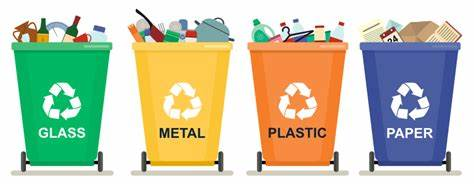


Waste management is a challenge for the whole world. To combat climate change, precise waste disposal is critical. When materials that could be recycled or composted are diverted to landfills, powerful greenhouse gases like methane are released. Hence, the waste needs to be segregated to reduce the toxic waste ending on the landfills. Manual Garbage sorting is time-consuming and a costly procedure, which is why scientists develop and research automated sorting ways to improve the recycling process' efficiency.[1]

In recent times, Waste data is monitored in smart garbage systems that rely on the paradigm of Internet-of-Things. Rubbish data is collected utilising sensors beneath waste containers in these smart systems. The acquired sensor data is sent to the cloud on a regular basis for analysis and decision-making. [2,3] One of the sensors capture the images of the waste which can be further processes for image classification. Image processing and artificial intelligence, particularly deep learning, is being used to autonomously segregate waste into recyclable and organic waste.

### Objective/Methodology
In this notebook, we adopt a deep convolution neural network (CNN) approach for classifying waste (Recycle and Organic). It highlights a step by step approach on how to implement a deep CNN to perform image classification problem on waste data (images). The implementation methodology is as follows:

1. Importing the DATASET using kaggle API
    1. Downloading and unzipping folder to access images


2. Exploratory Data Analysis 
    1. Visualising and counting the numbe rof images in each train and test images


3. Data Augmentation
    1. Augmenting the existing data by using zoom, shear, flip.. parameters of ImageDataGenerator
    2. Creating a Training, Validation and Testing dataset using Flow_from_directory method of ImageDataGenerator and batch size.
    

4. Modeling:
    1. Model Architecture
    2. Defining Callbacks and compiliation
    3. Training the model
    4. Validation and training Loss/Accuracy plots
   
   
5. Testing

        
6. Conclusion


7. References


Note: This was initially implemented on Google Colab. To make it work on jupyter notebook, we have to install kaggle library using the command: "pip install kaggle"

### Dataset Description:

It is an image dataset (.zip file format) which contains a TRAIN and TEST folder with 'R' and 'O' in each of these folder.
'R' - Recyclable waste labelled folder contains pictures classified as "Recylclable"
'O' - Organic waste label contains pictures classified as "Organic"

Dataset link: https://www.kaggle.com/techsash/waste-classification-data

## 1. Importing DATASET using Kaggle API

In [1]:
#Downlading the dataset using Kaggle json file and API for dataset
import os
os.environ['KAGGLE_USERNAME'] = "divitsaini" # username from the json file
os.environ['KAGGLE_KEY'] = "a6f797604b7cac5129cdada9513ca135" # key from the json file
!kaggle datasets download -d techsash/waste-classification-data

waste-classification-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
# unzipping the folder
import zipfile

local_zip = '/content/waste-classification-data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

## 2. Exploratory data Analysis

In [3]:
# printing the files in the folders

#ignoring any warnings
import warnings
warnings.filterwarnings('ignore')

# Get all the folder names in the file
data_dir_list = os.listdir('/content/DATASET')
print(data_dir_list)

['TEST', 'TRAIN']


Total training Organic waste images : 12565
Total training Recycled waste images : 9999


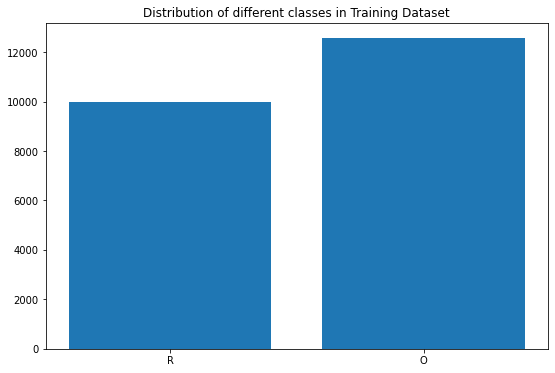

In [4]:
# Exploring training dataset

#creating variables for each folder
Organic_train_dir = os.path.join('/content/DATASET/TRAIN/O')
Recycled_train_dir = os.path.join('/content/DATASET/TRAIN/R')


print('Total training Organic waste images :', len(os.listdir(Organic_train_dir)))
print('Total training Recycled waste images :', len(os.listdir(Recycled_train_dir)))

# creating a dictionary of the images in train dataset: values = number of images; key = Folder name
image_folder = ['R', 'O']
dict_imgs = {}              
for i in image_folder:
    nimages = len(os.listdir('/content/DATASET/TRAIN/'+i+'/'))
    dict_imgs[i]=nimages


# plotting a bargraph

import matplotlib.pyplot as plt
plt.figure(figsize=(9, 6))
plt.bar(range(len(dict_imgs)), list(dict_imgs.values()), align='center')
plt.xticks(range(len(dict_imgs)), list(dict_imgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

Total Testing Organic waste images : 1401
Total Testing Recycled waste images : 1112


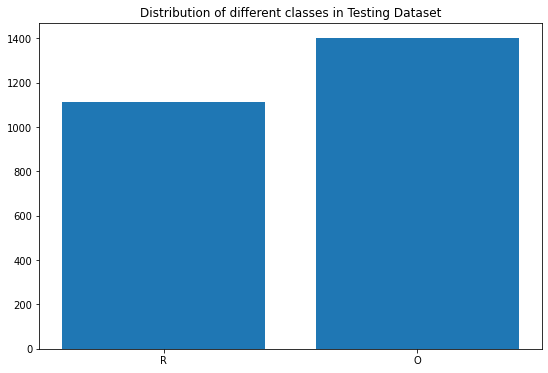

In [5]:
# Exploring Dataset

#creating variables for each folder
Organic_test_dir = os.path.join('/content/DATASET/TEST/O')
Recycled_test_dir = os.path.join('/content/DATASET/TEST/R')


print('Total Testing Organic waste images :', len(os.listdir(Organic_test_dir)))
print('Total Testing Recycled waste images :', len(os.listdir(Recycled_test_dir)))

# creating a dictionary of the images in test dataset: values = number of images; key = Folder name
image_folder = ['R', 'O']
dict_imgs = {}              
for i in image_folder:
    nimages = len(os.listdir('/content/DATASET/TEST/'+i+'/'))
    dict_imgs[i]=nimages


#plotting a bargraph
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 6))
plt.bar(range(len(dict_imgs)), list(dict_imgs.values()), align='center')
plt.xticks(range(len(dict_imgs)), list(dict_imgs.keys()))
plt.title('Distribution of different classes in Testing Dataset')
plt.show()

In [6]:
# creating a variables which contains all the names of the files
R_train_files = os.listdir(Recycled_train_dir)
O_train_files = os.listdir(Organic_train_dir)

#creating a list of Organic and Recyclable waste images (path of the images)
pic_index = 3
next_O = [os.path.join(Organic_train_dir, fname) for fname in O_train_files[pic_index-3 : pic_index]]
next_R = [os.path.join(Recycled_train_dir, fname) for fname in R_train_files[pic_index-3 : pic_index]]

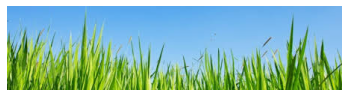

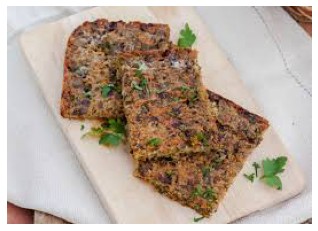

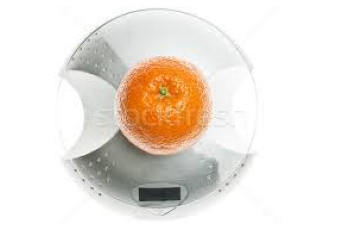

In [7]:
# Plotting the first 3 images classified as organic and Recyclable waste

import matplotlib.image as mpimg

# Organic Waste
for i, img_path in enumerate(next_O):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

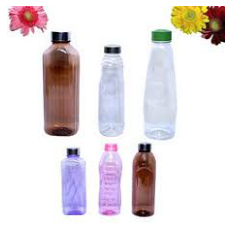

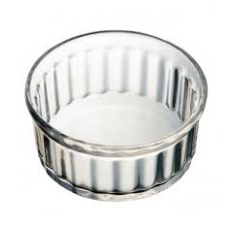

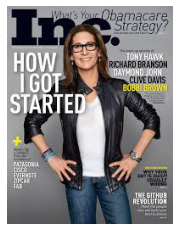

In [8]:
# Recyclable Waste
for i, img_path in enumerate(next_R):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

## 3. Data Augmentation

The process of enhancing the amount and variety of data is known as data augmentation. We don't acquire new data; instead, we transform existing data. Geometric changes such as flipping, rotation, translation, cropping, and scaling are some of the easy transformations applied to the image. These are necessary to enrich our dataset and capture every possible augmentation so that model captures the same image in it's dofferent transformations. Below shows the different transformations of the orginal image.

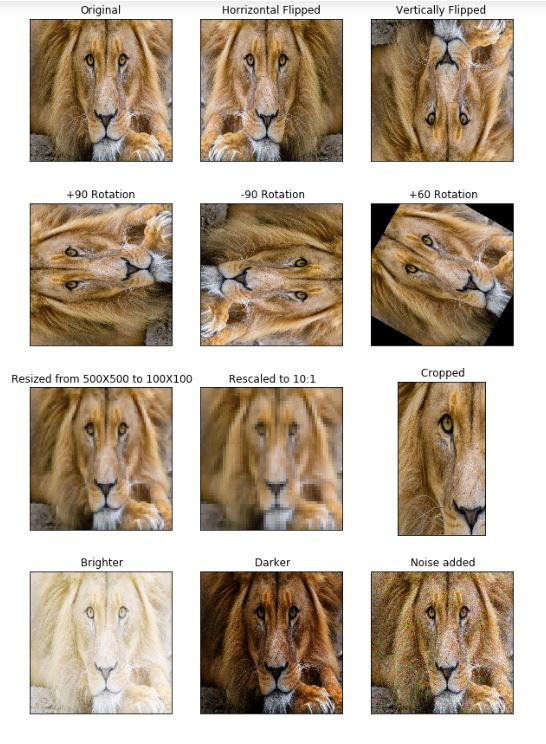

Image Source: https://www.mygreatlearning.com/blog/understanding-data-augmentation/

In [9]:
# importing necessary libraries for Data Augmentation

import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

### 3.1 Training and validation dataset

There are two steps in creating the generator:

1. Instantiate ImageDataGenerator with required parameters for augmention
2. Use appropriate flow command to construct the generator which will yield tuples of (x,y). These are batches of tensor image data from the appropriate folder.

Check out the documention of this class: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [10]:
training_dir = '/content/DATASET/TRAIN/'
training_datagen = ImageDataGenerator(rescale = 1./255, #rescaling factor
                                      rotation_range = 40, #rotates the images by 40 deg
                                      width_shift_range = 0.2, # Shifts the image along the width dimension.
                                      height_shift_range = 0.2, #Shifts the image along the height dimension
                                      shear_range = 0.2, # Range for shear angle in counter-clockwise direction in degrees
                                      zoom_range = 0.2, # Range for random zoom
                                      horizontal_flip = True, # flips the image horizontally
                                      vertical_flip = True, # flips the image vertically
                                      fill_mode = 'nearest', # Points to the nearest image
                                      validation_split = 0.2) # Creating a validation dataset with 20%

train_generator = training_datagen.flow_from_directory( training_dir, # directory from which the images are collected
                                                        target_size = (224,224),
                                                        class_mode = 'binary', # since we only have two classes
                                                        batch_size = 128,
                                                        subset = 'training') # Creating a training dataset with 20%

#creating validation dataset
validation_datagen = ImageDataGenerator(rescale = 1.0 / 255.0,
                                        validation_split = 0.2) # Creating a validation dataset with 20%

validation_generator = validation_datagen.flow_from_directory(training_dir, # directory from which the images are collected
                                                              target_size = (224,224),
                                                              class_mode = 'binary',
                                                              batch_size = 128,
                                                              subset = 'validation') # Creating a validation dataset with 20%

Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.


### 3.2 Testing Set

In [11]:
testing_dir = '/content/DATASET/TEST/'
testing_datagen = ImageDataGenerator(rescale = 1./255)


testing_generator = validation_datagen.flow_from_directory(  testing_dir,
                                                              target_size = (224,224),
                                                              class_mode = 'binary',
                                                              batch_size = 128)

Found 2513 images belonging to 2 classes.


## 4. Modeling

In [12]:
# importing nexessary libraries for Modeling a CNN
import tensorflow.keras as keras

# different layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

# for callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

# Optimiser
from tensorflow.keras.optimizers import Adam

# For reading images
from skimage.io import imread, imshow
from keras.preprocessing import image

### 4.1 Model Architecture

In [13]:
# to clear the session everytime the notebook is re-run
keras.backend.clear_session()

The model consists of 6 (Convoluion + Pooling layers + Dropout) layers with a Dense layer. The activation function used was "Relu".

A CNN architecture comprises of multiple neural layers. The three main type of layers used are:
1. **Convolution layers**: The convolutional layer computes the convolutional operation of the input tensor images using kernel filters to extract fundamental features. 

    The convolution operation Paramters of Conv2D are

    1. The filter size used in each convolution layer: size (3,3)
    2. The first parameter is the number of filters
    3. Input shape is the tensor image (RGB) input from the training_datagen
    4. Padding used is of type 'same' (default)
    5. Activation is applied after convolution occurs (Relu is used)
    6. As the architecture deepens the number of filters are increased to extract minute features from the images.


2. **Pooling layers**: They are mainly used to reduce the dimensions of the tensor output vector after convolution opertion. This reduces the number of trainable paramters in back-propogation step. They are usually placed between 2 convolution layers. The filter size used in each MaxPool2D: size (2,2)


3. **Dense Layers**: The Fully connected dense layer are usually placed before the output dense layer and form the last few layers of a CNN Architecture. In this layer, the input image from the previous layers are flattened and fed to the fully connected layer. In this stage, the classification process begins to take place. The output layer is the last dense layer in the CNN architecture. It has 1 neuron for a binary classification problem and the activation function of "sigmoid" is used.

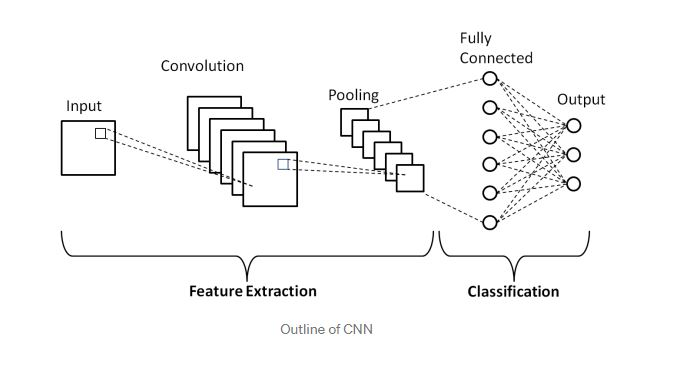

Useful resources to understand CNN:
1. https://in.mathworks.com/discovery/convolutional-neural-network-matlab.html
2. https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/
3. https://datawow.io/blogs/interns-explain-cnn-8a669d053f8b

In [14]:
model = Sequential([
    # Convolutional layer and maxpool layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(224,224, 3)), 
    MaxPooling2D(2, 2), 
    Dropout(0.5), # used to avoid overfitting
    
    # Convolutional layer and maxpool layer 2
    Conv2D(32, (3, 3), activation='relu'), 
    MaxPooling2D(2, 2), 
    Dropout(0.5),
    
    # Convolutional layer and maxpool layer 3
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.5),
    
    # Convolutional layer and maxpool layer 4
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.5),
    
    # Convolutional layer and maxpool layer 5
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.5),
    
    # Convolutional layer and maxpool layer 6
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.5),
    
    # Fully connected layer and Output layer
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        1

### 4.2. Defining callbacks:

A callback is a set of functions to be applied at given stages of the training procedure.

1. ModelCheckpoint: Helps you save your model when validation accuracy reaches a minimum in between training before overfitting.
2. ReduceLROnPlateau: Helps you reduce your learning rate by a factor when the last few val_accuracy hasn't been changed. Hence, helps in convergence faster.

In [15]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience = 4, # if for the past 3 epochs, the accuracy remians constant
                                            factor = 0.6, # decrease the learning rate by 0.6
                                            min_lr = 0.00001)
# Defining Callbacks

filepath = './best_weights.hdf5'
checkpoint_model    = ModelCheckpoint(filepath, 
                                monitor = 'val_accuracy', 
                                mode='max', # model with maximum val_accuracy is saved
                                save_best_only=True, 
                                verbose = 1)

callback_list = [learning_rate_reduction, checkpoint_model]


#compilation of the model
model.compile(optimizer=Adam(), # one of the best optimisers
              loss='binary_crossentropy', # since it is binary classification
              metrics = ['accuracy']) # performance metrics used

### 4.3. Training the model

Note: The difference between a training step and an epoch is that a training step is one gradient update. One whole cycle of the training data constitutes an epoch. This normally entails a number of steps.

In [16]:
history = model.fit_generator(train_generator,
                              epochs=20,
                              verbose=1,
                              validation_data=validation_generator, # using the validation dataset created
                              callbacks = callback_list # giving the callback list
                              )

Epoch 1/20
142/142 [==============================] - 207s 1s/step - loss: 0.6430 - accuracy: 0.6256 - val_loss: 0.5686 - val_accuracy: 0.7320

Epoch 00001: val_accuracy improved from -inf to 0.73205, saving model to ./best_weights.hdf5
Epoch 2/20
142/142 [==============================] - 201s 1s/step - loss: 0.4751 - accuracy: 0.7990 - val_loss: 0.5269 - val_accuracy: 0.7516

Epoch 00002: val_accuracy improved from 0.73205 to 0.75155, saving model to ./best_weights.hdf5
Epoch 3/20
142/142 [==============================] - 200s 1s/step - loss: 0.4485 - accuracy: 0.8103 - val_loss: 0.5421 - val_accuracy: 0.7507

Epoch 00003: val_accuracy did not improve from 0.75155
Epoch 4/20
142/142 [==============================] - 203s 1s/step - loss: 0.4314 - accuracy: 0.8145 - val_loss: 0.4959 - val_accuracy: 0.7992

Epoch 00004: val_accuracy improved from 0.75155 to 0.79920, saving model to ./best_weights.hdf5
Epoch 5/20
142/142 [==============================] - 205s 1s/step - loss: 0.4093 - 

### 4.4. Loss/Accuracy Plots (Training and Validation)

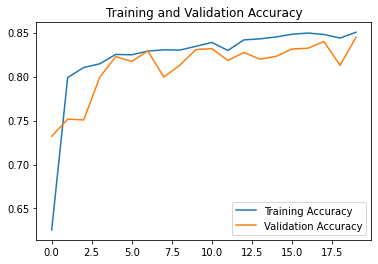

In [17]:
# SAVING THE DATA IN DIFFEREN APPROPRIATE VARIABLES
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

# Accuracy plot for traning and validation data for each epoch
plt.figure()
plt.plot(epochs, acc, label = 'Training Accuracy')
plt.plot(epochs, val_acc, label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

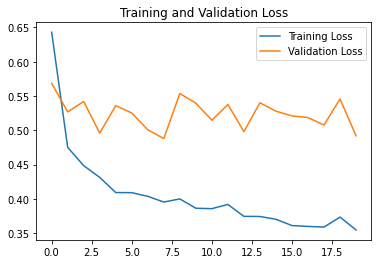

In [18]:
# Loss plot for traning and validation data for each epoch
plt.figure()
plt.plot(epochs, loss, label = 'Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

## 5.0 Testing the model

In [19]:
# Evaluating Loss and AUC for Test data 

model.evaluate(testing_generator)

20/20 [==============================] - 5s 255ms/step - loss: 0.4438 - accuracy: 0.8778


[0.4438173472881317, 0.8778352737426758]

In [74]:
# printing the class labels for testing dataset
test_dict = testing_generator.class_indices
idc = {k:v for v,k in test_dict.items()}
idc

{0: 'O', 1: 'R'}

In [75]:
# creating a variables which contains all the names of the files
R_test_files = os.listdir(Recycled_test_dir)
O_test_files = os.listdir(Organic_test_dir)

#creating a list of Organic and Recyclable waste images (path of the images)
pic_index = 40
next_O_test = [os.path.join(Organic_test_dir, fname) for fname in O_test_files[pic_index-3 : pic_index]]
next_R_test = [os.path.join(Recycled_test_dir, fname) for fname in R_test_files[pic_index-3 : pic_index]]
print(next_O_test)
print(next_R_test)

['/content/DATASET/TEST/O/O_13336.jpg', '/content/DATASET/TEST/O/O_12930.jpg', '/content/DATASET/TEST/O/O_13360.jpg']
['/content/DATASET/TEST/R/R_10733.jpg', '/content/DATASET/TEST/R/R_10820.jpg', '/content/DATASET/TEST/R/R_10597.jpg']


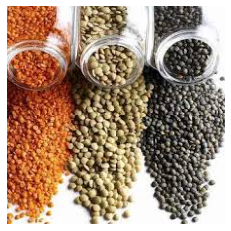

The image belongs to Organic waste category 


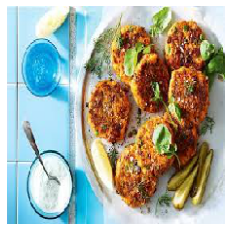

The image belongs to Organic waste category 


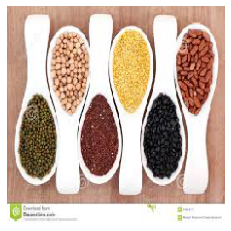

The image belongs to Organic waste category 


In [71]:
# Classifying the first three images in "O" folder of TEST using model
for i, img_path in enumerate(next_O_test):
    # loading the images as array
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    
    # rescaling the image
    img = img/255
    
    # showing the loaded image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # pre_processing step along with predicting the class probability
    img = np.expand_dims(img,axis=0)
    pred = model.predict_proba(img)

    if pred[0][0] > 0.5:
        print("The image belongs to Recycle waste category")
    else:
        print("The image belongs to Organic waste category ")


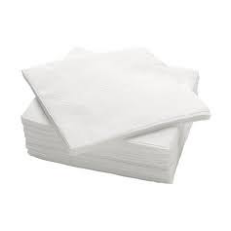

The image belongs to Recycle waste category


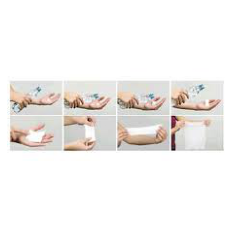

The image belongs to Recycle waste category


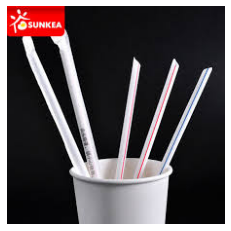

The image belongs to Recycle waste category


In [72]:
# Classifying the first three images in "R" folder of TEST using model
for i, img_path in enumerate(next_O_test):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = img/255

    plt.imshow(img)
    plt.axis('off')
    plt.show()


    img = np.expand_dims(img,axis=0)
    pred = model.predict_proba(img)

    if pred[0][0] > 0.5:
        print("The image belongs to Recycle waste category")
    else:
        print("The image belongs to Organic waste category ")


## 6. Conclusion

A Binary image classification model that classifies the waste into Recyclable and Organic categories was created. The model obtained had the validation accuracy of 0.845 and training accuracy of 0.878. 

The model's accuracy could be further improved by 
1. Reducing the batch size which increases the number of steps per epoch
2. Increasing the epochs as seen from the Loss/Accuracy graphs
3. By dropping the last convolution + pooling layer as it reduces the dimensions to 1,1,128 from 5,5,128 which is not optimum.

In the testing phase, the model accurately classifies the three images mentioned.


## 7. References

[1] Janusz Bobulski, Mariusz Kubanek, "Deep Learning for Plastic Waste Classification System", Applied Computational Intelligence and Soft Computing, vol. 2021, Article ID 6626948, 7 pages, 2021. https://doi.org/10.1155/2021/6626948

[2] Amin Mazloumian, et al, 'Deep Learning for Classifying Food Waste", DeepAI.org publication. https://deepai.org/publication/deep-learning-for-classifying-food-waste

[3] V. Bhor, P. Morajkar, M. Gurav, D. Pandya, and A. Deshpande (2015) Smart garbage management system. International Journal of Engineering Research & Technology (IJERT) 4 (03), pp. 2000.

Article Links:
1. https://medium.com/techiepedia/binary-image-classifier-cnn-using-tensorflow-a3f5d6746697
2. https://medium.com/iitg-ai/how-to-use-callbacks-in-keras-to-visualize-monitor-and-improve-your-deep-learning-model-c9ca37901b28#:~:text=What%20is%20callback%20in%20Keras%20A%20callback%20is,the%20model%20during%20training.%20Ok%20Let%E2%80%99s%20get%20started